Sumber dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/mushrooms.csv')
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


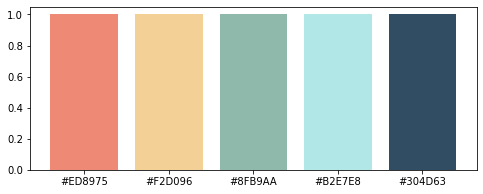

In [2]:
# Tambahan: palette yang digunakan pada notebook ini.
colors = ['#ED8975', '#F2D096', '#8FB9AA', '#B2E7E8', '#304D63']
plt.figure(figsize=(8,3))
plt.bar(colors, 1, color=colors)
plt.show()

#sns.set_palette(sns.color_palette(colors))

In [3]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

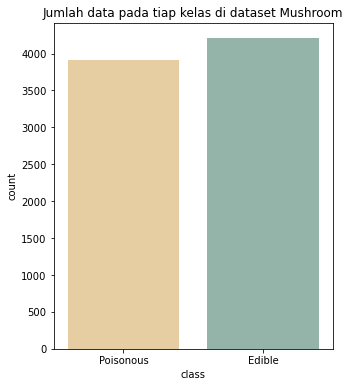

In [4]:
plt.figure(figsize=(5,6))
plt.title('Jumlah data pada tiap kelas di dataset Mushroom')

ax = sns.countplot(data=df, x='class', palette=['#F2D096', '#8FB9AA'])
ax.set_xticklabels(['Poisonous', 'Edible'])

plt.show()

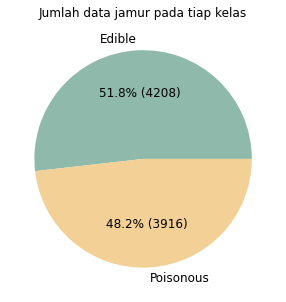

In [5]:
def convert_to_num(x):
    return '{}% ({:.0f})'.format(np.round(x,2), df['class'].count()*x/100)

plt.figure(figsize=(5,5))
plt.title('Jumlah data jamur pada tiap kelas')
plt.pie(df['class'].value_counts(), 
        labels=['Edible', 'Poisonous'], 
        colors=['#8FB9AA', '#F2D096'],
        autopct=convert_to_num, 
        textprops={'fontsize': 12})
plt.show()

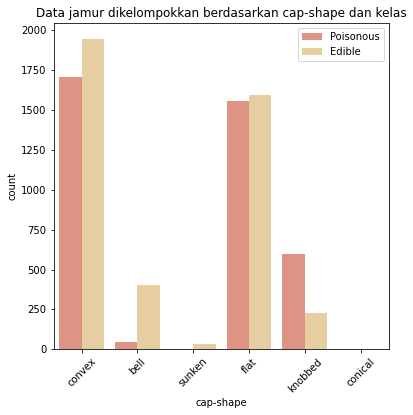

In [6]:
plt.figure(figsize=(6,6))
plt.title('Data jamur dikelompokkan berdasarkan cap-shape dan kelas')

ax = sns.countplot(data=df, x='cap-shape', hue='class', 
                   palette=['#ED8975','#F2D096'])
ax.set_xticklabels(['convex', 'bell', 'sunken', 'flat', 
                    'knobbed', 'conical'])

plt.xticks(rotation=45)
plt.legend(['Poisonous', 'Edible'], loc=1)
plt.show()

In [7]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [8]:
print('Jumlah jamur dengan cap-shape b dan kelas p:')
print(df[(df['cap-shape'] == 'b') & (df['class'] == 'p')]['class'].count())
print()
print('Jumlah jamur dengan cap-shape b dan kelas e:')
print(df[(df['cap-shape'] == 'b') & (df['class'] == 'e')]['class'].count())

Jumlah jamur dengan cap-shape b dan kelas p:
48

Jumlah jamur dengan cap-shape b dan kelas e:
404


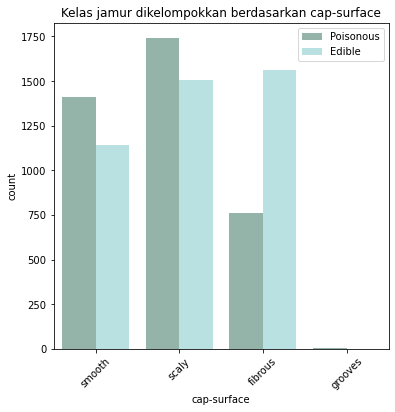

In [9]:
plt.figure(figsize=(6,6))
plt.title('Kelas jamur dikelompokkan berdasarkan cap-surface')
ax = sns.countplot(data=df, x='cap-surface', hue='class', 
                   palette=['#8FB9AA', '#B2E7E8'])
ax.set_xticklabels(['smooth', 'scaly', 'fibrous', 'grooves'])

plt.xticks(rotation=45)
plt.legend(['Poisonous', 'Edible'], loc=1)
plt.show()

In [10]:
df[df['cap-surface'] == 'g'][['class', 'cap-surface']]

,class,cap-surface
5107,p,g
5126,p,g
5128,p,g
5717,p,g


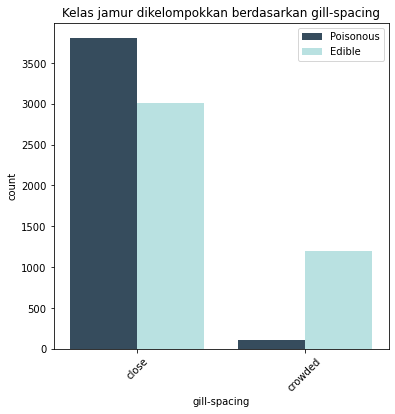

In [11]:
plt.figure(figsize=(6,6))
plt.title('Kelas jamur dikelompokkan berdasarkan gill-spacing')

ax = sns.countplot(data=df, x='gill-spacing', 
                   hue='class', palette=['#304D63', '#B2E7E8'])
ax.set_xticklabels(['close', 'crowded'])

plt.xticks(rotation=45)
plt.legend(['Poisonous', 'Edible'], loc=1)
plt.show()

In [12]:
df[df['gill-spacing'] == 'd']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [13]:
df[df['gill-spacing'] == 'w']['class'].value_counts()

e    1200
p     112
Name: class, dtype: int64

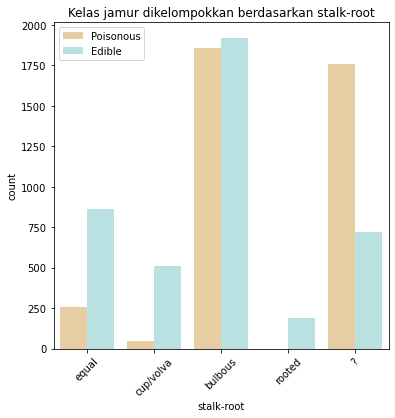

In [14]:
plt.figure(figsize=(6,6))
plt.title('Kelas jamur dikelompokkan berdasarkan stalk-root')

ax = sns.countplot(data=df, x='stalk-root', hue='class', 
                   palette=['#F2D096', '#B2E7E8'])
ax.set_xticklabels(['equal', 'cup/volva', 'bulbous', 'rooted', '?'])

plt.xticks(rotation=45)
plt.legend(['Poisonous', 'Edible'], loc=2)
plt.show()

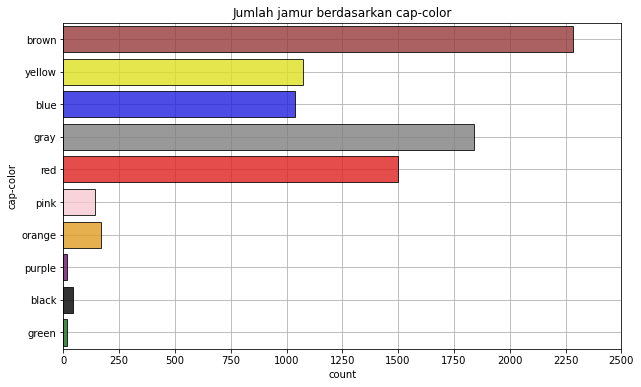

In [15]:
colors = ['brown', 'yellow', 'blue', 'gray', 'red', 
          'pink', 'orange', 'purple', 'black', 'green']

plt.figure(figsize=(10,6))
plt.title('Jumlah jamur berdasarkan cap-color')

ax = sns.countplot(data=df, y='cap-color', palette=colors, 
                   zorder=2, alpha=0.8, edgecolor='black')
ax.set_yticklabels(colors)

plt.xticks([i for i in range(0,2750,250)])
plt.grid(zorder=1)
plt.show()

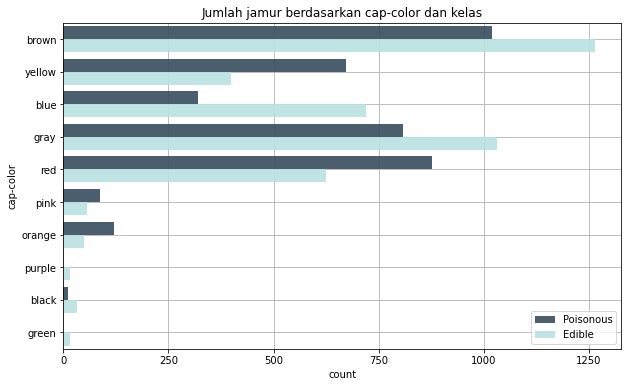

In [16]:
plt.figure(figsize=(10,6))
plt.title('Jumlah jamur berdasarkan cap-color dan kelas')

ax = sns.countplot(data=df, y='cap-color', hue='class', 
                   palette=['#304D63', '#B2E7E8'], zorder=2, 
                   alpha=0.9)
ax.set_yticklabels(colors)

plt.legend(['Poisonous', 'Edible'], loc=4)
plt.xticks([i for i in range(0,1500,250)])
plt.grid(zorder=1)
plt.show()

In [17]:
df[df['cap-color'] == 'r'][['class', 'cap-color']]

,class,cap-color
4326,e,r
4898,e,r
5284,e,r
5302,e,r
5351,e,r
5430,e,r
5497,e,r
5528,e,r
5551,e,r
5586,e,r


In [18]:
df[df['cap-color'] == 'u'][['class', 'cap-color']]

,class,cap-color
4076,e,u
4396,e,u
4533,e,u
4557,e,u
4647,e,u
4663,e,u
4717,e,u
4984,e,u
5005,e,u
5023,e,u


In [19]:
df[df['cap-color'] == 'c'][['class', 'cap-color']].value_counts()

class  cap-color
e      c            32
p      c            12
dtype: int64